# Tutorial - 7.11.16

The following performs the usual imports, tells `matplotlib` to make inline plots (rather than opening a new window every time), and sets the backend for said inline plots to the desired format. Use `retina` for *very* high-res screens, `png` for the rest. `svg` is also a possibility (good if e.g., you want to drag-and-drop plots to a presentation you are working on), but keep in mind these are huge files and will take ages in the case of RSM plotting.

In [1]:
import edoxrd as xrd # This is our module!
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_formats = set(['retina']) 

Next the directory with the data files we shall be looking at is specified as `d`. The functions which read or plot data are made to accept input in the form `(datafile, datadir)` with the idea that data files that correspond to a given sample are all stored in the same directory. So you only need to specify it once at the beginning of the notebook. (Not tested on Windows...!)

In [2]:
d = './example_data/'
%ls {d} # should work on Windows too!

e16014_01_-103_KTO_RSM_2-Theta.asc  e16014_07_t2t_001.ras
e16014_02_-103_PTO_RSM_2-Theta.asc  e16014_09_t2t_002.ras


## Read

`read_data` oddly enough reads the data. This is 1D position, intensity values in `.ras` format.

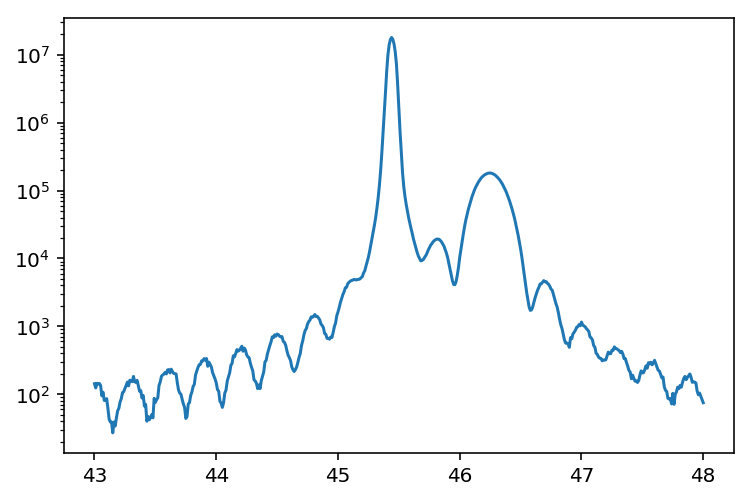

In [4]:
xdata, ydata = xrd.read_data(d+'e16014_09_t2t_002.ras')

plt.plot(xdata, ydata);
plt.yscale('log')

`read_rsm_data` does the same but with RSM data, this time in `.asc` format. Note that three values need to be unpacked. The function has keyword arguments to choose the intensity scale and the angular mapping of the values, check the docstring for more info.

/users/zatterin/Documents/sware/edoxrd/read.py:121: RuntimeWarning: divide by zero encountered in log
  I = np.log(d2)


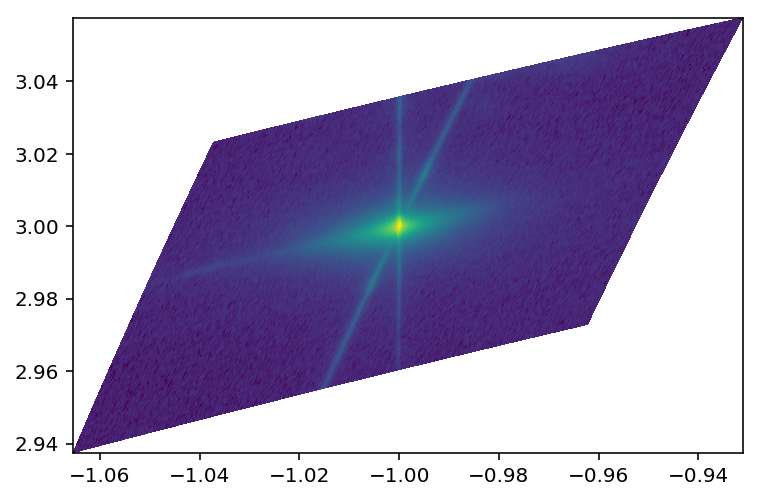

In [5]:
h, l, i = xrd.read_rsm_data(d+'e16014_01_-103_KTO_RSM_2-Theta.asc')

plt.pcolormesh(h,l,i);

Note that the output of the above are always 3 two-dimensional arrays; the *x* and *y* positional meshes onto which the Intensity has to be mapped. The `matplotlib.pyplot` functions capable of plotting mapped meshes are `pcolormesh` (used above), `contour`, `contourf`.

## Calculate

I'm going to generate some arbitrary $2\theta$ values for illustrative purposes, from $0$ to $90^{\circ}$:

In [6]:
ttheta = np.linspace(0,90,1000)

`calc_str_fac` calculates the unit cell Structure Factor for a specified perovskite -- the choice of material being of course very limited... The data used to make such calculation and thus the available materials are specified in the datafiles `data/material_parameters` and `data/atom_positions` within the package. It should be easy to add data should you need it.

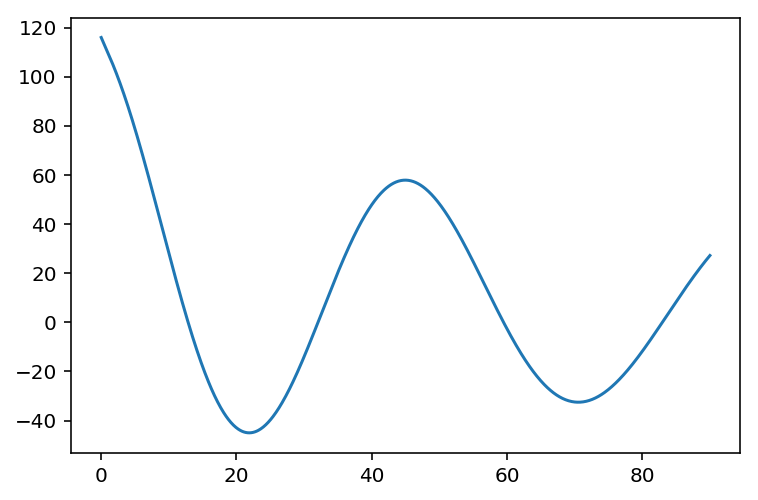

In [7]:
F = xrd.calc_str_fac('KTO',ttheta) 

plt.plot(ttheta, F.real); # F is a complex number!

`calc_ctr` simulates the diffraction pattern of a thin film system around a Bragg peak as specified by the input raw data. The latter again has to be in `.ras` format. There is a doctstring you can have a look at (always should!), however since it has lots of parameters it's worth an intro. The format is:

> `x, y = calc_ctr(fname, d, sub, film, Nfilm, c_film, Nelectrode_b=0, Nelectrode_t=0, c_electrode_b=0, c_electrode_t=0, scale=1e7, Nsub=1e4)`

- `fname,d`: the usual filename and directory strings.
- `sub`: the Substrate - e.g., `'KTO'`.
- `film`: the Film, - e.g., `'PTO'`.
- `Nfilm`: the thickness of the Film in number of unit cells (u.c.)
- `c_film`: the Film out-of-plane lattice parameter, in Angstroems.

Keyword arguments. Use if you have a top or bottom electrode (or both), and when using widgets:

- `Nelectrode_b` and `Nelectrode_t`: the thickness of the bottom and top Electrode (SRO), in u.c., respectively.
- `c_electrode_b`, `c_electrode_t`: the bottom and top Electrode out-of-plane lattice parameters, in Angstroems.
- `scale`: an overall multiplicative factor -- to be used to compare satisfactorily the calculated and experimental profiles (clearly the calculated intensity values must be scaled!)
- `Nsub`: the thickness of the Substrate in u.c.

In [8]:
x, y = xrd.calc_ctr(d+'e16014_09_t2t_002.ras','KTO', 'PTO', 60, 3.92)

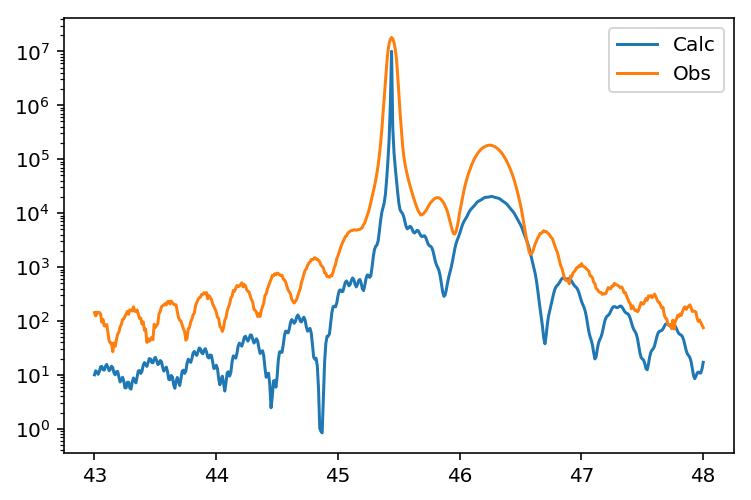

In [9]:
plt.plot(x,y.real, label='Calc')
plt.plot(xdata, ydata, label='Obs') # Our original experimental data
plt.yscale('log')
plt.legend();

The function is constructed so to be 'widget friendly', which means that you can easily play around with the parameters. Have a look at `CTR_template.ipynb`.

`calc_thickness` calculates the thickness of the film based on the Laue oscillations on the left or right hand side of the Film peak. The intensity threshold and distance between peaks to be found by the algorithm needs to be specified, as well as wether to use the RHS or the LHS of the main Film peak. There are default values but you almost surely will have to play around with them to not get an error/get the desired result.

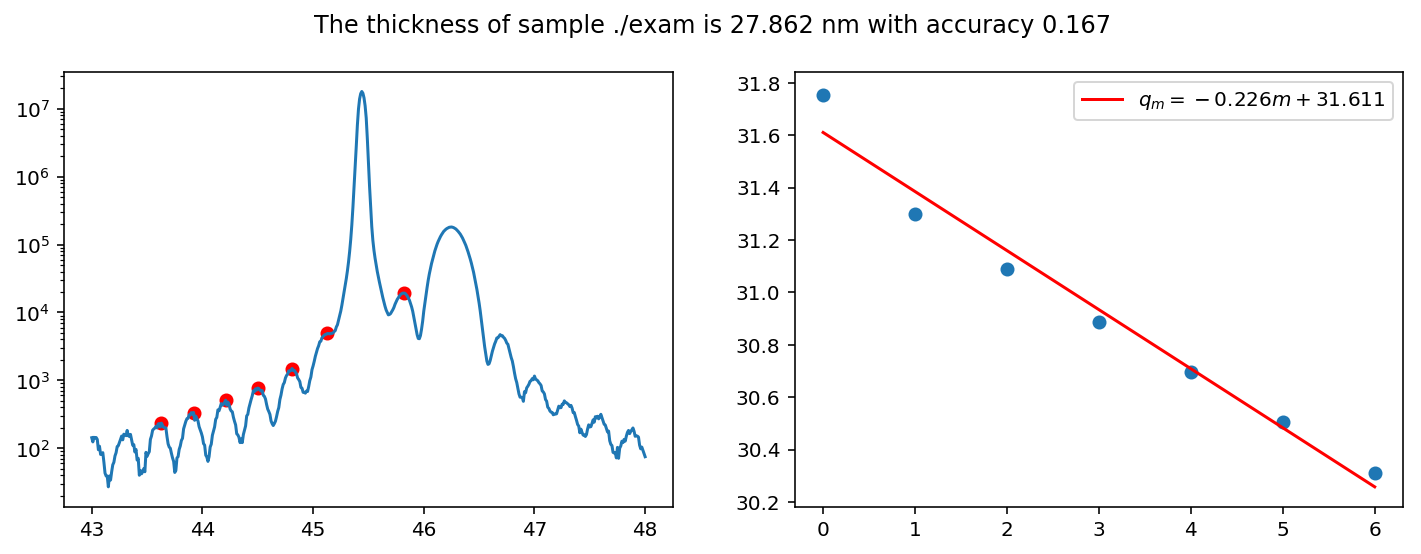

In [10]:
t = xrd.calc_thickness(d+'e16014_09_t2t_002.ras', threshold=1e-5, distance=14, side='l')

Note that the function returns a value as well as plotting i) the peaks which were selected for the calculation and ii) the linear fit performed.

## Plot

These are functions to make some plotting a bit faster; in principle what is above should suffice.

`plt_rsm` reads and plots RSM data from both the substrate and the film. The intensity can be normalised to either the film or the substrate, have a look at the docstring.

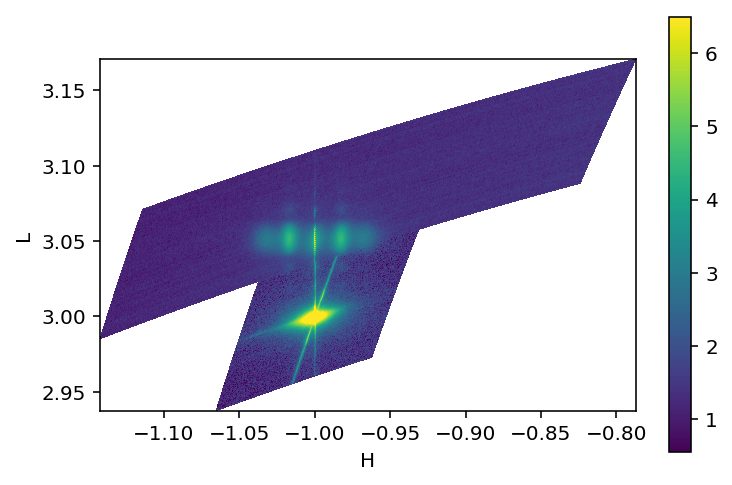

In [11]:
xrd.plt_rsm(d+'e16014_01_-103_KTO_RSM_2-Theta.asc',d+'e16014_02_-103_PTO_RSM_2-Theta.asc') # plt_rsm(substrate_file, film_file, d)

`plt_prof` plots the profile of an RSM at a specific H or L position. You can also select the scale, log or linear (check the doctsring!).

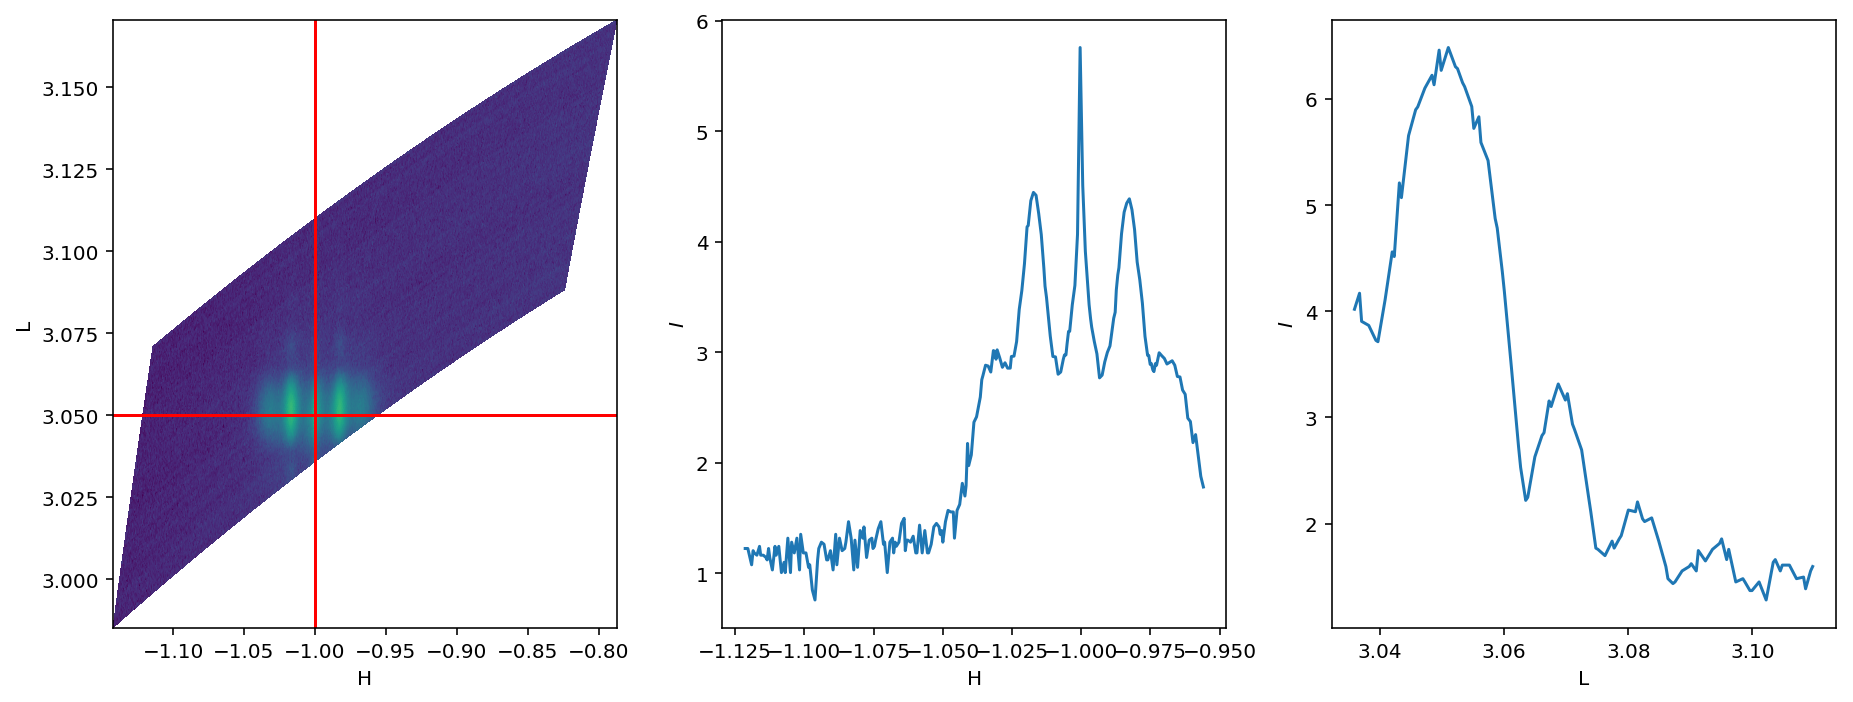

In [12]:
xrd.plt_prof(d+'e16014_02_-103_PTO_RSM_2-Theta.asc', -1,3.05) # Remember this is the -103 reflection (it says on the filename!)